# LetsGrowMore Virtual Internship Program (LGMVIP) [Sept.2021 - Oct. 2021]

# Task 1 : Iris Flowers Classification

## Importing the Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the dataset

In [35]:
df=pd.read_csv("/content/iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.shape

(150, 5)

In [38]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

## Drop Unwanted Columns

## Exploratory Data Analysis

### Sepal

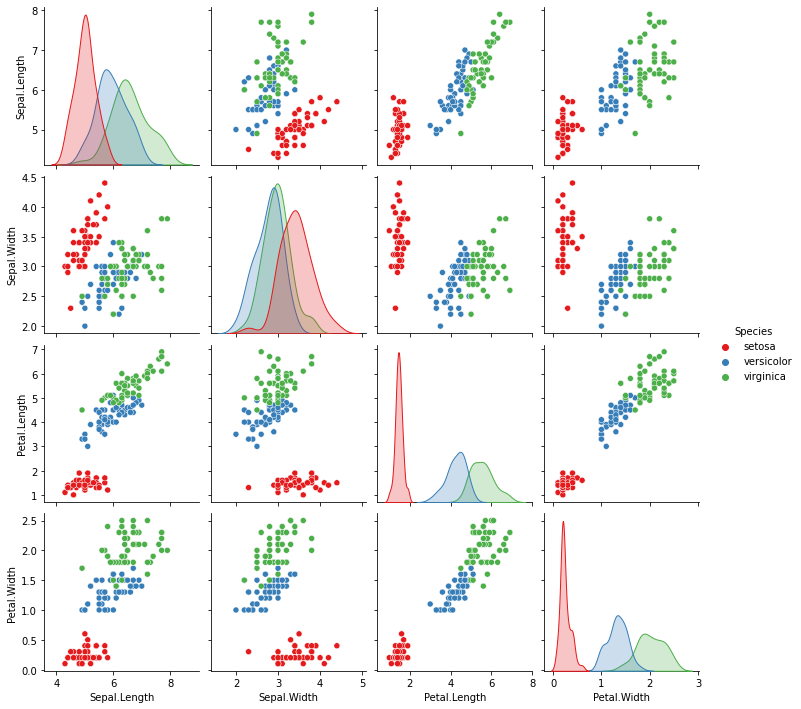

In [40]:
sns.pairplot(df, hue='Species',palette='Set1')

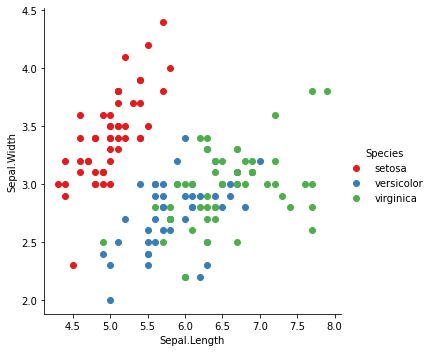

In [41]:
sns.FacetGrid(df, hue='Species',height=5,palette='Set1')\
.map(plt.scatter,'Sepal.Length','Sepal.Width')\
.add_legend()

## Petal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ce967750>,
      dtype=object)

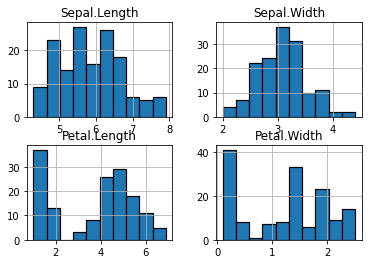

In [42]:
df.hist(edgecolor='black',linewidth=1.2)

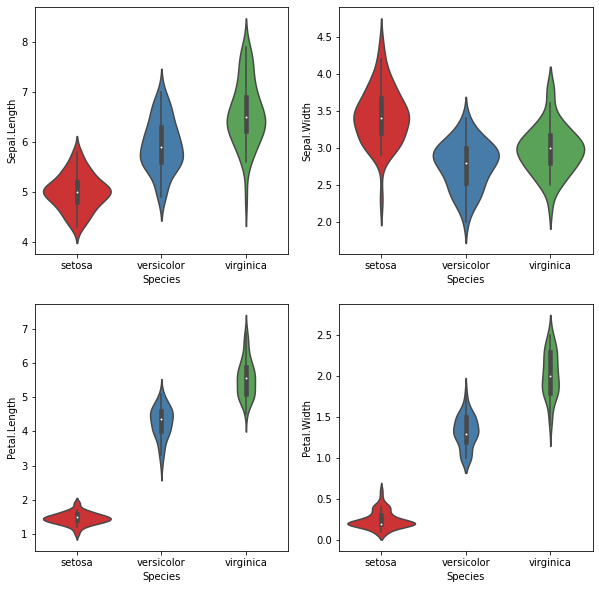

In [43]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(data=df, x='Species',y='Sepal.Length',palette='Set1')
plt.subplot(2,2,2)
sns.violinplot(data=df, x='Species',y='Sepal.Width',palette='Set1')

plt.subplot(2,2,3)
sns.violinplot(data=df,x='Species', y='Petal.Length',palette='Set1')
plt.subplot(2,2,4)
sns.violinplot(data=df, x='Species', y='Petal.Width',palette='Set1')

**As this is a Classification Problem, we will use Classification Algorithms to build our model**.

### Importing Packages for Classification algorithms

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

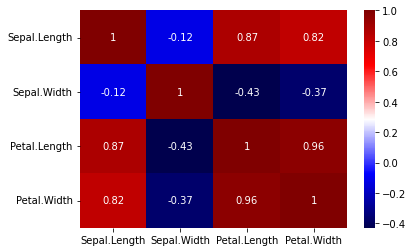

In [45]:
sns.heatmap(df.corr(), annot=True, cmap='seismic')
plt.show()

**In the above figure, we can see that Sepal Length and Width are not correlated. While, the Petal Length and Width are highly correlated**.

## 1. We will use "ALL" the features to Train the algorithm and Check the accuracy.

### Splitting the data into Train and Test set

In [46]:
X = df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y = df['Species']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [48]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [49]:
X_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [50]:
y_train.head()

60     versicolor
116     virginica
144     virginica
119     virginica
108     virginica
Name: Species, dtype: object

## Logistic Regression (LR)

In [51]:
model = LogisticRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(prediction,y_test))

Logistic Regression accuracy =  0.9777777777777777


## Support Vector Machine (SVM)

In [52]:
model = svm.SVC()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(prediction,y_test))

SVM accuracy =  0.9777777777777777


## Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(prediction,y_test))

Decision Tree accuracy =  0.9777777777777777


## K-Nearest Neighbors (KNN)

In [54]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(prediction,y_test))

KNN accuracy =  0.9777777777777777


**CONCLUSION**: By applying the above 4 Machine Learning algorithms, we see that all our models give the exact same High Accuracy.

## 2. We will use "Sepal and Petal features separately" to Train the algorithm and Check the accuracy.

### Splitting the Sepal data and Petal data into Train and Test set

## Sepal

In [55]:
sepal_X = df[['Sepal.Length','Sepal.Width']]
sepal_y = df['Species']

sepal_X_train, sepal_X_test, sepal_y_train, sepal_y_test = train_test_split(sepal_X, sepal_y, test_size=0.3,random_state=0)

## Petal

In [56]:
petal_X = df[['Petal.Length','Petal.Width']]
petal_y = df['Species']

petal_X_train, petal_X_test, petal_y_train, petal_y_test = train_test_split(petal_X, petal_y, test_size=0.3,random_state=0)

## Logistic Regression (LR)

In [57]:
model = LogisticRegression()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('Logistic Regression accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('Logistic Regression accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

Logistic Regression accuracy for Sepal =  0.8222222222222222
Logistic Regression accuracy for Petal =  0.9777777777777777


## Support Vector Machine (SVM)

In [58]:
model = svm.SVC()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('SVM accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('SVM accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

SVM accuracy for Sepal =  0.8
SVM accuracy for Petal =  0.9777777777777777


## Decision Tree

In [59]:
model = DecisionTreeClassifier()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('Decision Tree accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('Decision Tree accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

Decision Tree accuracy for Sepal =  0.6666666666666666
Decision Tree accuracy for Petal =  0.9555555555555556


## K-Nearest Neighbors (KNN)

In [60]:
model = KNeighborsClassifier()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('KNN accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('KNN accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

KNN accuracy for Sepal =  0.7333333333333333
KNN accuracy for Petal =  0.9777777777777777


## CONCLUSION :

**The accuracy is 97.7%**.
